In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# 데이터 로딩
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 가우시안 나이브 베이즈 모델 생성 및 학습
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [8]:
print(metrics.confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [9]:
# 새로운 데이터에 대한 예측
new_data = [[4.9, 3.0, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3]]
predicted = gnb.predict(new_data)

for feature, category in zip(new_data, predicted):
    print(f"{feature} => {iris.target_names[category]}")

[4.9, 3.0, 1.4, 0.2] => setosa
[6.7, 3.0, 5.2, 2.3] => virginica


In [17]:
# 다항(Multinomial) 나이브 베이즈

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = int(input('Enter the news number : '))
x = news.data[n:n + 1]

y = model.predict(x)[0]
print(x[0])
print("=" * 80)

print("실제 클래스:", news.target_names[news.target[n]])
print("예측 클래스:", news.target_names[y])

Enter the news number : 1004
From: mikey@sgi.com (Mike Yang)
Subject: Re: 17" Monitors
Nntp-Posting-Host: eukanuba.wpd.sgi.com
Organization: Silicon Graphics, Inc.
Lines: 12

In article <1qslfs$bm1@access.digex.net> rash@access.digex.com (Wayne Rash) writes:
>I also reviewed a new Nanao, the F550iW, which has just
>been released.

What's the difference between the F550i and the new F550iW?  I'm
about to buy a Gateway system and was going to take the F550i
upgrade.  Should I get the F550iW instead?

-----------------------------------------------------------------------
                 Mike Yang        Silicon Graphics, Inc.
               mikey@sgi.com           415/390-1786


실제 클래스: comp.sys.ibm.pc.hardware
예측 클래스: comp.sys.ibm.pc.hardware


In [12]:
# 베르누이(Bernoulli) 나이브 베이즈

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# 가상의 이메일 데이터 생성 (0: 정상 메일, 1: 스팸 메일)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train[0:3])
print(y_train[0:3])

[[ -0.26378451   4.85910915   5.3573149    1.23863887   2.25584845
   -0.07857477  -2.03209313   2.08768059   1.20433597  -1.61241503
   -1.52401687   3.12511716  -0.61642781   1.01613441   2.00446181
   -2.52462759   0.70880286  -3.434274     1.64550928  -2.13790679]
 [ -2.54394076   5.96963699   4.00176186   2.24556267   1.37518178
    2.27462316   1.53731686  -0.16799523  -2.87151691   0.47532101
   -1.67330371   3.49284785   1.97775602  -5.73379357  -2.83232995
    1.83065898   0.52166423   1.5071903    0.76351931   4.40043702]
 [  7.99204468  10.0215351    3.93791949   1.65202231   6.87378358
   -0.57555558  -3.64133385   2.92987266  -3.58184087  -4.42030074
   -1.39872754  -4.99301828   3.05229032   2.8125008    0.85035154
  -10.11012351   4.10292451  -5.0093172   -1.47714212  -7.32148839]]
[1 1 0]


In [13]:
# Bernoulli Naive Bayes 모델 생성 및 훈련
clf = BernoulliNB()
clf.fit(X_train, y_train)

# 테스트 세트에서 예측
y_pred = clf.predict(X_test)

# 정확도 계산
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.76


In [14]:
# 새로운 데이터에 대한 예측
new_data = [[0.5, 0.2, 0.3, 0.1, 0.7, 0.1, 0.2, 0.4, 0.3, 0.6,
             0.8, 0.1, 0.5, 0.2, 0.7, 0.6, 0.4, 0.5, 0.3, 0.7],  # 새로운 데이터 1
            [0.1, 0.2, 0.4, 0.7, 0.2, 0.1, 0.6, 0.3, 0.5, 0.1,
             0.2, 0.4, 0.1, 0.7, 0.6, 0.3, 0.5, 0.2, 0.8, 0.4]]  # 새로운 데이터 2

new_pred = clf.predict(new_data)

# 새로운 데이터의 예측 결과 출력
print(f"New data predictions: {new_pred}")

New data predictions: [1 1]


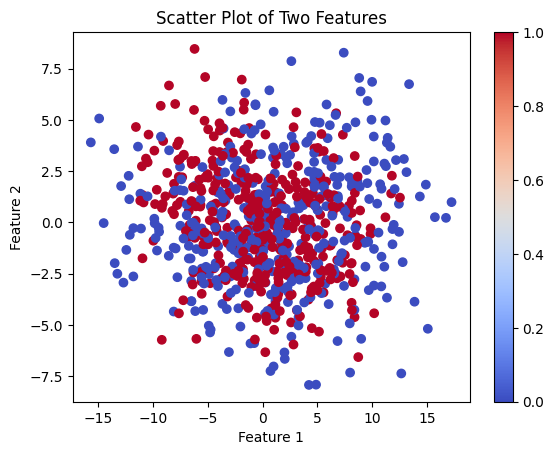

In [10]:
# 데이터의 차원이 20차원이므로 2개의 특성만 선택하여 시각화
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Two Features')
plt.colorbar()
plt.show()